In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import pandas as pd

pd.set_option('display.max_rows', 100)

In [3]:
import numpy as np

In [4]:
from lint_analysis.bin_counts import cache

In [5]:
tokens = cache.token_pos_counts(10000)

________________________________________________________________________________
[Memory] Calling lint_analysis.bin_counts.models.token_pos_counts...
token_pos_counts(10000)
______________________________________________token_pos_counts - 697.6s, 11.6min


In [ ]:
data = []

for i, ((token, pos), count) in enumerate(tokens.items()):
    
    series = cache.token_series(token, pos=pos)
    exp_var = series.sum() * (1/100) * (1 - 1/100)
    
    data.append((token, pos, count, series.var(), exp_var))
    
    if i % 1000 == 0: print(i)

In [7]:
df = pd.DataFrame(data, columns=('token', 'pos', 'count', 'var', 'exp'))

In [8]:
import math

df['score'] = df.index.map(
    lambda t: df.loc[t]['var'] / df.loc[t]['exp']
)

In [9]:
df['score_rank'] = df.rank(ascending=False)['score']

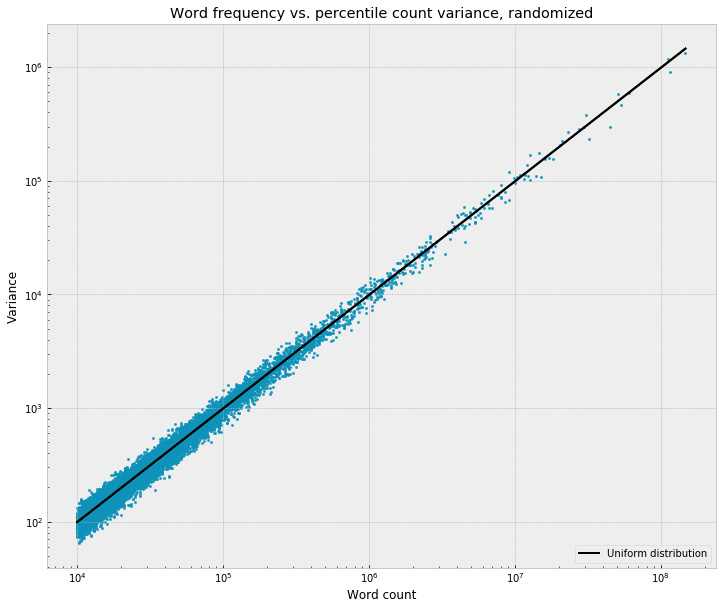

In [12]:
plt.figure(figsize=(12, 10))

plt.title('Word frequency vs. percentile count variance, randomized')
plt.xlabel('Word count')
plt.ylabel('Variance')
plt.xscale('log')
plt.yscale('log')

plt.scatter(df['count'], df['var'], s=5, c='#0e92ba')
plt.plot(df['count'], df['exp'], c='black')

uniform, = plt.plot(
    df['count'], df['exp'],
    c='black', label='Uniform distribution',
)
        
plt.legend(handles=[uniform], loc=4)

plt.show()